In [2]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import json 

# import plotly 


# Load the Dataset

# Da die Attributsnamen kodiert sind werden diese zu erst mithilfe der zugehörigen Dokumentation ersetzt. (Siehe Categorical.json)


In [3]:
file_path = "../German_Credit_data/Data/german.data"

names = ['Status Checking', 'Duration in Month', 'Credit History', 'Purpose', 'Credit Amount', 
         'Savings Account', 'Employement since', 'Installmentrate %', 'StatusSex', 'Otherdebtos', 
         'PresentResidence', 'Property', 'Age in years', 'Otherinstallment Plans', 'Housing', 
         'Number existing Credits', 'Job', 'Number people liable', 'Telephone', 'Foreign Worker', 'Target']
german_data = pd.read_csv(file_path,names=names,delim_whitespace=True, header=None)
catgories = open('../German_Credit_data/Data/categorical.json')
json_data = json.load(catgories)
json_data
for h in names:
    if h in json_data:
        german_data[h] = german_data[h].map(json_data[h])

In [4]:
german_data

,Status Checking,Duration in Month,Credit History,Purpose,Credit Amount,Savings Account,Employement since,Installmentrate %,StatusSex,Otherdebtos,...,Property,Age in years,Otherinstallment Plans,Housing,Number existing Credits,Job,Number people liable,Telephone,Foreign Worker,Target
0,less than 0 DM,6,critical account / other credits existing (not...,radio/television,1169,unknown / no savings account,bigger than or equal 7 years,4,male : single,None,...,real estate,67,None,own,2,skilled employee /official,1,"yes, registered under the customers name",yes,1
1,0 less than or equal and less than 200 DM,48,existing credits paind back duly till now,radio/television,5951,less than 100DM,1 less than or equal and less than 4 years,2,female : divorced/separated/married,None,...,real estate,22,None,own,1,skilled employee /official,1,None,yes,2
2,no checking account,12,critical account / other credits existing (not...,education,2096,less than 100DM,4 less than and equal and less than 7 years,2,male : single,None,...,real estate,49,None,own,1,unskilled-resident,2,None,yes,1
3,less than 0 DM,42,existing credits paind back duly till now,furniture/equipment,7882,less than 100DM,4 less than and equal and less than 7 years,2,male : single,guarantor,...,if not real estate : building society savings ...,45,None,for free,1,skilled employee /official,2,None,yes,1
4,less than 0 DM,24,delay in paying off in the past,car (new),4870,less than 100DM,1 less than or equal and less than 4 years,3,male : single,None,...,unknown/no property,53,None,for free,2,skilled employee /official,2,None,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paind back duly till now,furniture/equipment,1736,less than 100DM,4 less than and equal and less than 7 years,3,female : divorced/separated/married,None,...,real estate,31,None,own,1,unskilled-resident,1,None,yes,1
996,less than 0 DM,30,existing credits paind back duly till now,car (used),3857,less than 100DM,1 less than or equal and less than 4 years,4,male : divorced/separated,None,...,if not real estate : building society savings ...,40,None,own,1,management/self-employed/highly qualified empl...,1,"yes, registered under the customers name",yes,1
997,no checking account,12,existing credits paind back duly till now,radio/television,804,less than 100DM,bigger than or equal 7 years,4,male : single,None,...,"if not others options : car or other, not in s...",38,None,own,1,skilled employee /official,1,None,yes,1
998,less than 0 DM,45,existing credits paind back duly till now,radio/television,1845,less than 100DM,1 less than or equal and less than 4 years,4,male : single,None,...,unknown/no property,23,None,for free,1,skilled employee /official,1,"yes, registered under the customers name",yes,2


In [5]:
# check for missing values
german_data.isnull().sum()


Status Checking            0
Duration in Month          0
Credit History             0
Purpose                    0
Credit Amount              0
Savings Account            0
Employement since          0
Installmentrate %          0
StatusSex                  0
Otherdebtos                0
PresentResidence           0
Property                   0
Age in years               0
Otherinstallment Plans     0
Housing                    0
Number existing Credits    0
Job                        0
Number people liable       0
Telephone                  0
Foreign Worker             0
Target                     0
dtype: int64

# Daten auf Plausibilität prüfen

In [6]:
# describe the data
german_data.describe()


,Duration in Month,Credit Amount,Installmentrate %,PresentResidence,Age in years,Number existing Credits,Number people liable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


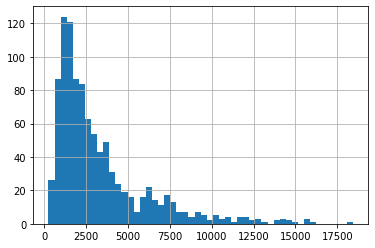

In [9]:
#check credit amount for outliers
german_data['Credit Amount'].hist(bins=50)
# x achse log 



<AxesSubplot:ylabel='Frequency'>

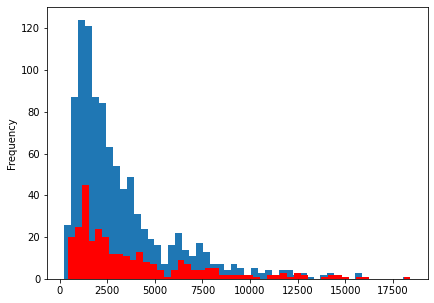

In [92]:
plt.subplot(1, 2, 1)
german_data['Credit Amount'].plot(kind='hist', logx=False, bins=50)
# plot histogram credit amout where target is 2
german_data.loc[german_data['Target'] == 2, 'Credit Amount'].plot(kind='hist', logx=False, bins=50, color='red', figsize=(15, 5))


<AxesSubplot:ylabel='Target'>

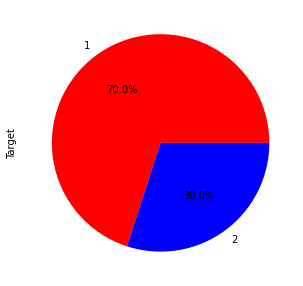

In [76]:
# plot target variable as pie chart with target 1 and target 2 as labels colored red and blue

german_data['Target'].value_counts().plot(kind='pie', colors=['red', 'blue'], autopct='%1.1f%%', figsize=(15, 5))

# Zielvariable ist Ungleichverteilt

# Untersuchung auf Outlier

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='Target'>

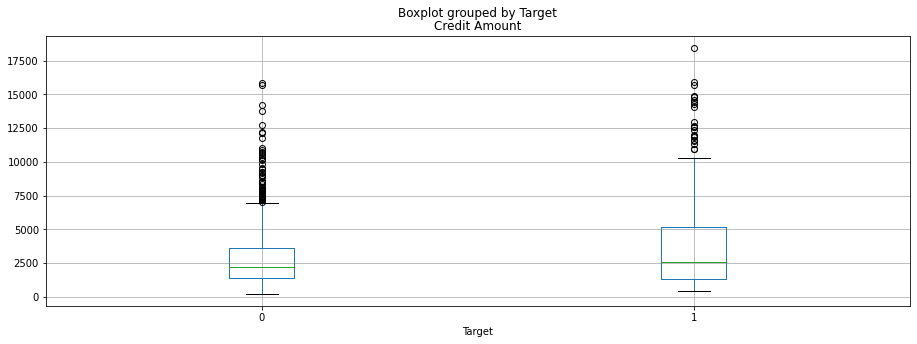

In [101]:
#box plot credit amount outliers
german_data.boxplot(column='Credit Amount', by='Target', figsize=(15, 5))

<AxesSubplot:xlabel='Credit Amount', ylabel='Target'>

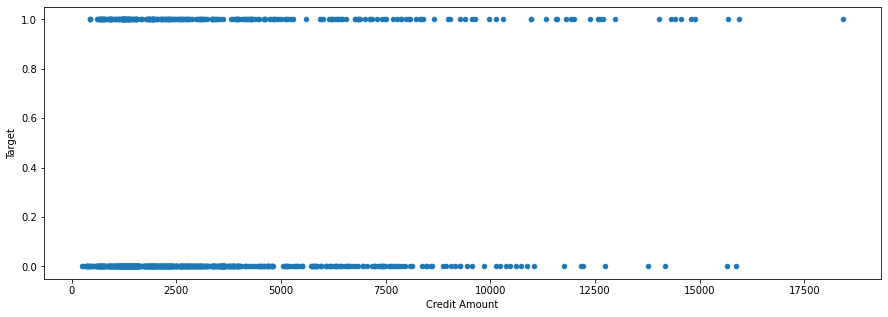

In [102]:
# scatter plot credit amount
german_data.plot(kind='scatter', x='Credit Amount', y='Target', figsize=(15, 5))

In [103]:
# calculate ZScore for credit amount
german_data['ZScore'] = (german_data['Credit Amount'] - german_data['Credit Amount'].mean()) / german_data['Credit Amount'].std()


<AxesSubplot:ylabel='Frequency'>

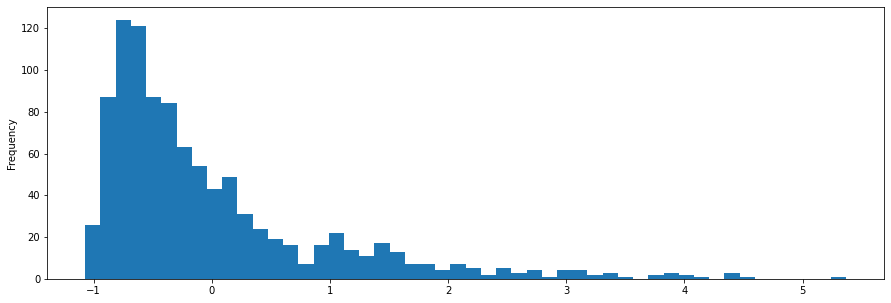

In [106]:
#plot zscore for credit amount
german_data['ZScore'].plot(kind='hist', bins=50, figsize=(15, 5))


In [112]:
# calculate IQR for credit amount
Q1 = np.percentile(german_data['Credit Amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(german_data['Credit Amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR
upper = german_data['Credit Amount'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = german_data['Credit Amount'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Credit Amount, Length: 1000, dtype: bool
(array([  5,  17,  18,  57,  63,  70,  78,  87,  95, 105, 130, 134, 136,
       180, 205, 226, 236, 268, 272, 274, 285, 291, 295, 304, 333, 373,
       374, 378, 381, 395, 402, 417, 431, 450, 491, 496, 509, 525, 549,
       563, 615, 616, 637, 645, 653, 657, 672, 684, 714, 736, 744, 763,
       771, 805, 808, 812, 818, 828, 832, 854, 881, 887, 895, 902, 915,
       917, 921, 927, 945, 953, 980, 983]),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Credit Amount, Length: 1000, dtype: bool
(array([], dtype=int64),)


/var/folders/rf/kg6tbnbs6md8psmvxmk30hmw0000gn/T/ipykernel_4216/1560321043.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(german_data['Credit Amount'], 25,
/var/folders/rf/kg6tbnbs6md8psmvxmk30hmw0000gn/T/ipykernel_4216/1560321043.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(german_data['Credit Amount'], 75,


In [84]:
# function to determine outlier values
def outlier_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))
# calculate the outlier values
outlier_iqr(german_data['Credit Amount'])

(array([  5,  17,  18,  57,  63,  70,  78,  87,  95, 105, 130, 134, 136,
        180, 205, 226, 236, 268, 272, 274, 285, 291, 295, 304, 333, 373,
        374, 378, 381, 395, 402, 417, 431, 450, 491, 496, 509, 525, 549,
        563, 615, 616, 637, 645, 653, 657, 672, 684, 714, 736, 744, 763,
        771, 805, 808, 812, 818, 828, 832, 854, 881, 887, 895, 902, 915,
        917, 921, 927, 945, 953, 980, 983]),)

In [94]:
# transform target value 2 to 1 and 1 to 0 to be binary
german_data['Target'] = german_data['Target'].map({2:1, 1:0})


In [99]:
# use logistic regression to predict target variable
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(german_data.drop('Target', axis=1), german_data['Target'], test_size=0.3, random_state=42)

# create logistic regression model
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train, y_train)
# predict the target variable
y_pred = logreg.predict(X_test)

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



ValueError: could not convert string to float: 'delay in paying off in the past'